In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score ,f1_score , roc_auc_score ,ConfusionMatrixDisplay ,confusion_matrix , roc_curve,RocCurveDisplay
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [151]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

In [152]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [170]:
df.Age.min()

21

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# (row, columns)
df.shape

(768, 9)

In [9]:
# distribution of outcome variable
df.Outcome.value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

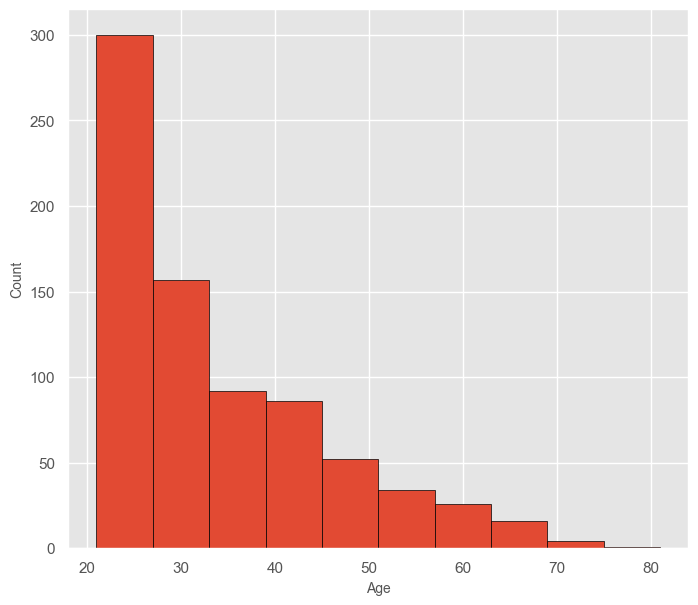

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [11]:
print(f"Max Age : {df['Age'].max()}")
print(f"Max Age : {df['Age'].min()}")

Max Age : 81
Max Age : 21


<Axes: xlabel='Age', ylabel='Density'>

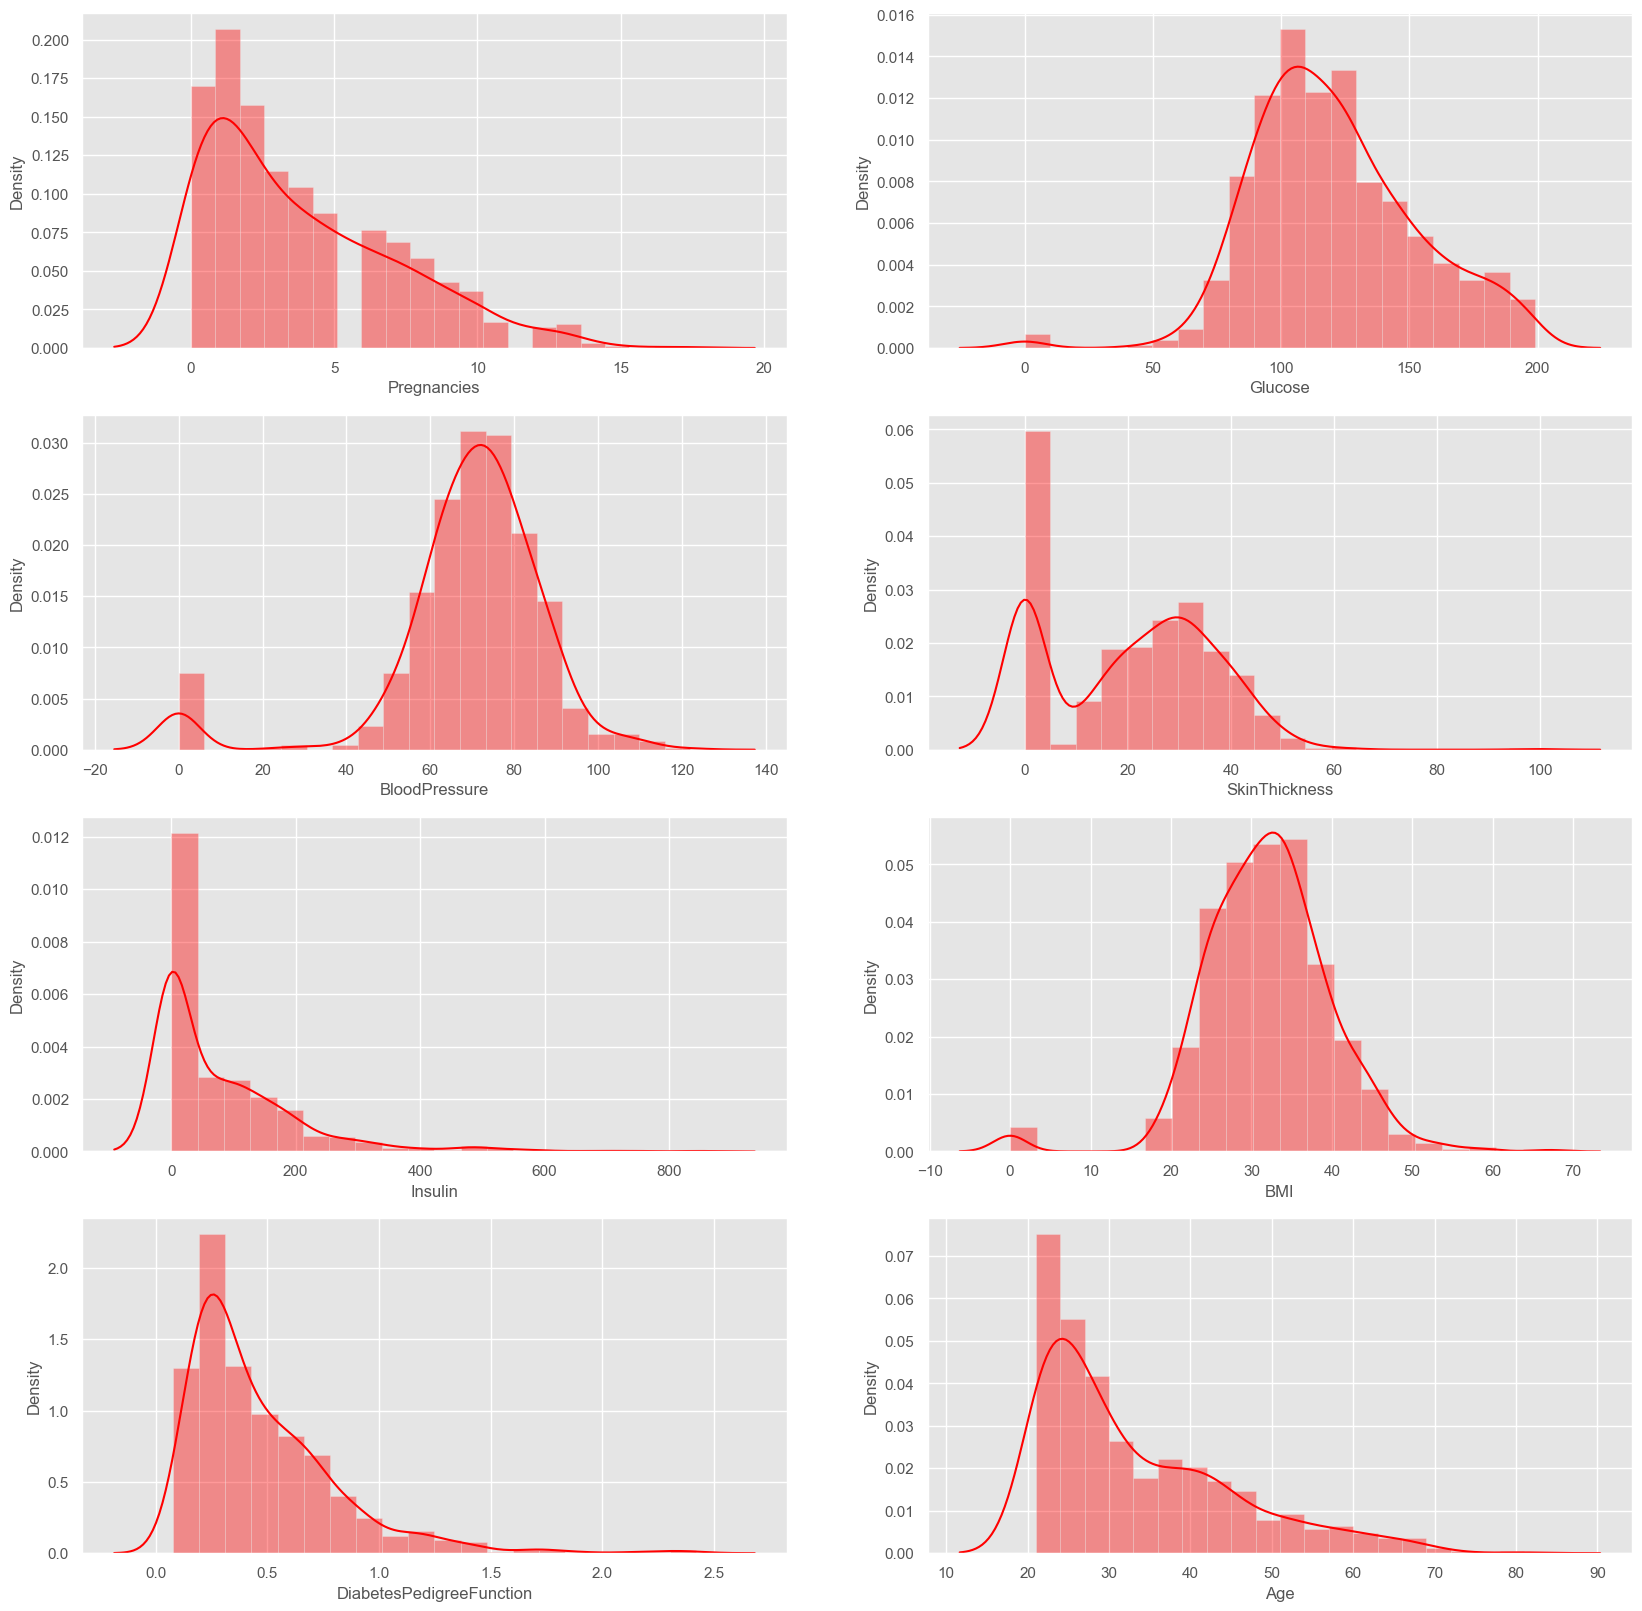

In [12]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [13]:
def gb(df):
    for col in df.columns:
        print(f"{col} Mean")
        print(df.groupby('Outcome').agg({col:'mean'}))
        print(f"{col} Max")
        print(df.groupby('Outcome').agg({col:'max'}))

In [14]:
gb(df)

Pregnancies Mean
         Pregnancies
Outcome             
0           3.298000
1           4.865672
Pregnancies Max
         Pregnancies
Outcome             
0                 13
1                 17
Glucose Mean
            Glucose
Outcome            
0        109.980000
1        141.257463
Glucose Max
         Glucose
Outcome         
0            197
1            199
BloodPressure Mean
         BloodPressure
Outcome               
0            68.184000
1            70.824627
BloodPressure Max
         BloodPressure
Outcome               
0                  122
1                  114
SkinThickness Mean
         SkinThickness
Outcome               
0            19.664000
1            22.164179
SkinThickness Max
         SkinThickness
Outcome               
0                   60
1                   99
Insulin Mean
            Insulin
Outcome            
0         68.792000
1        100.335821
Insulin Max
         Insulin
Outcome         
0            744
1            846
BMI Mean
  

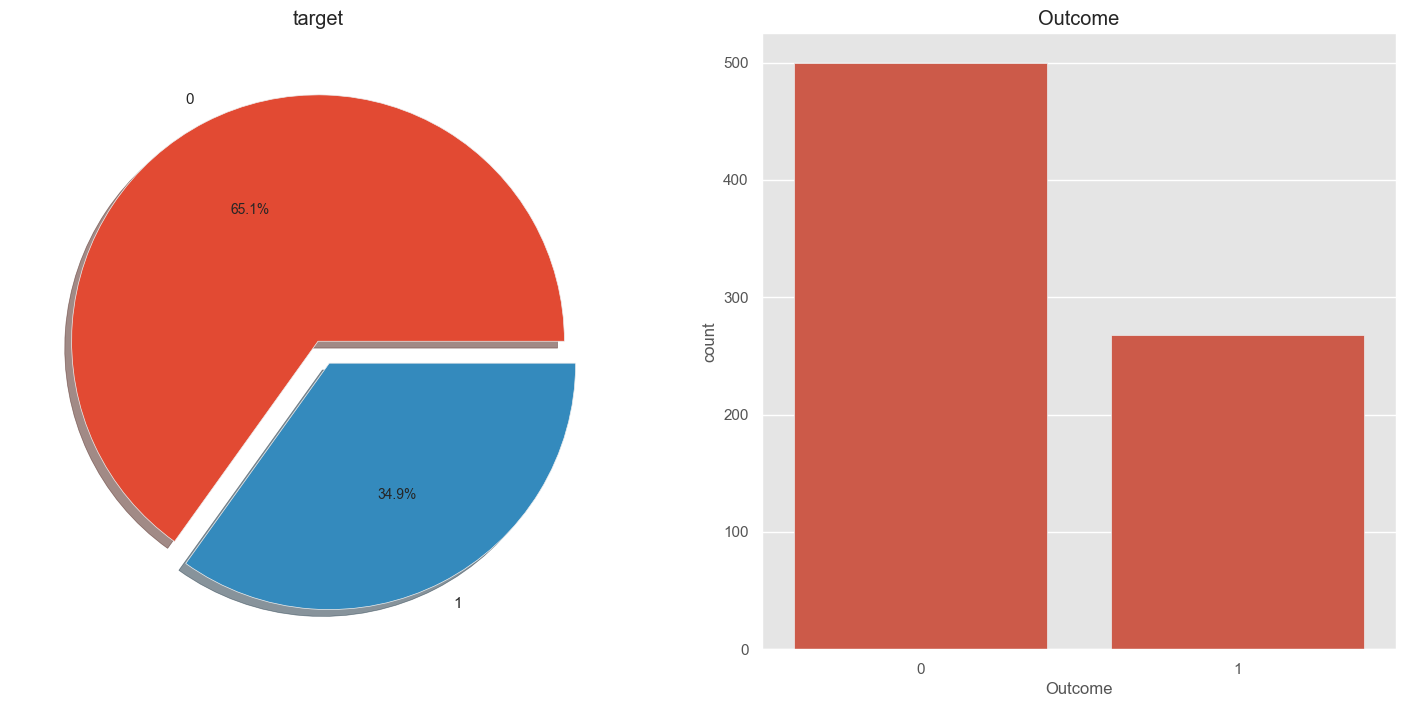

In [15]:
# 0>healthy
# 1>diabetes
f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [16]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

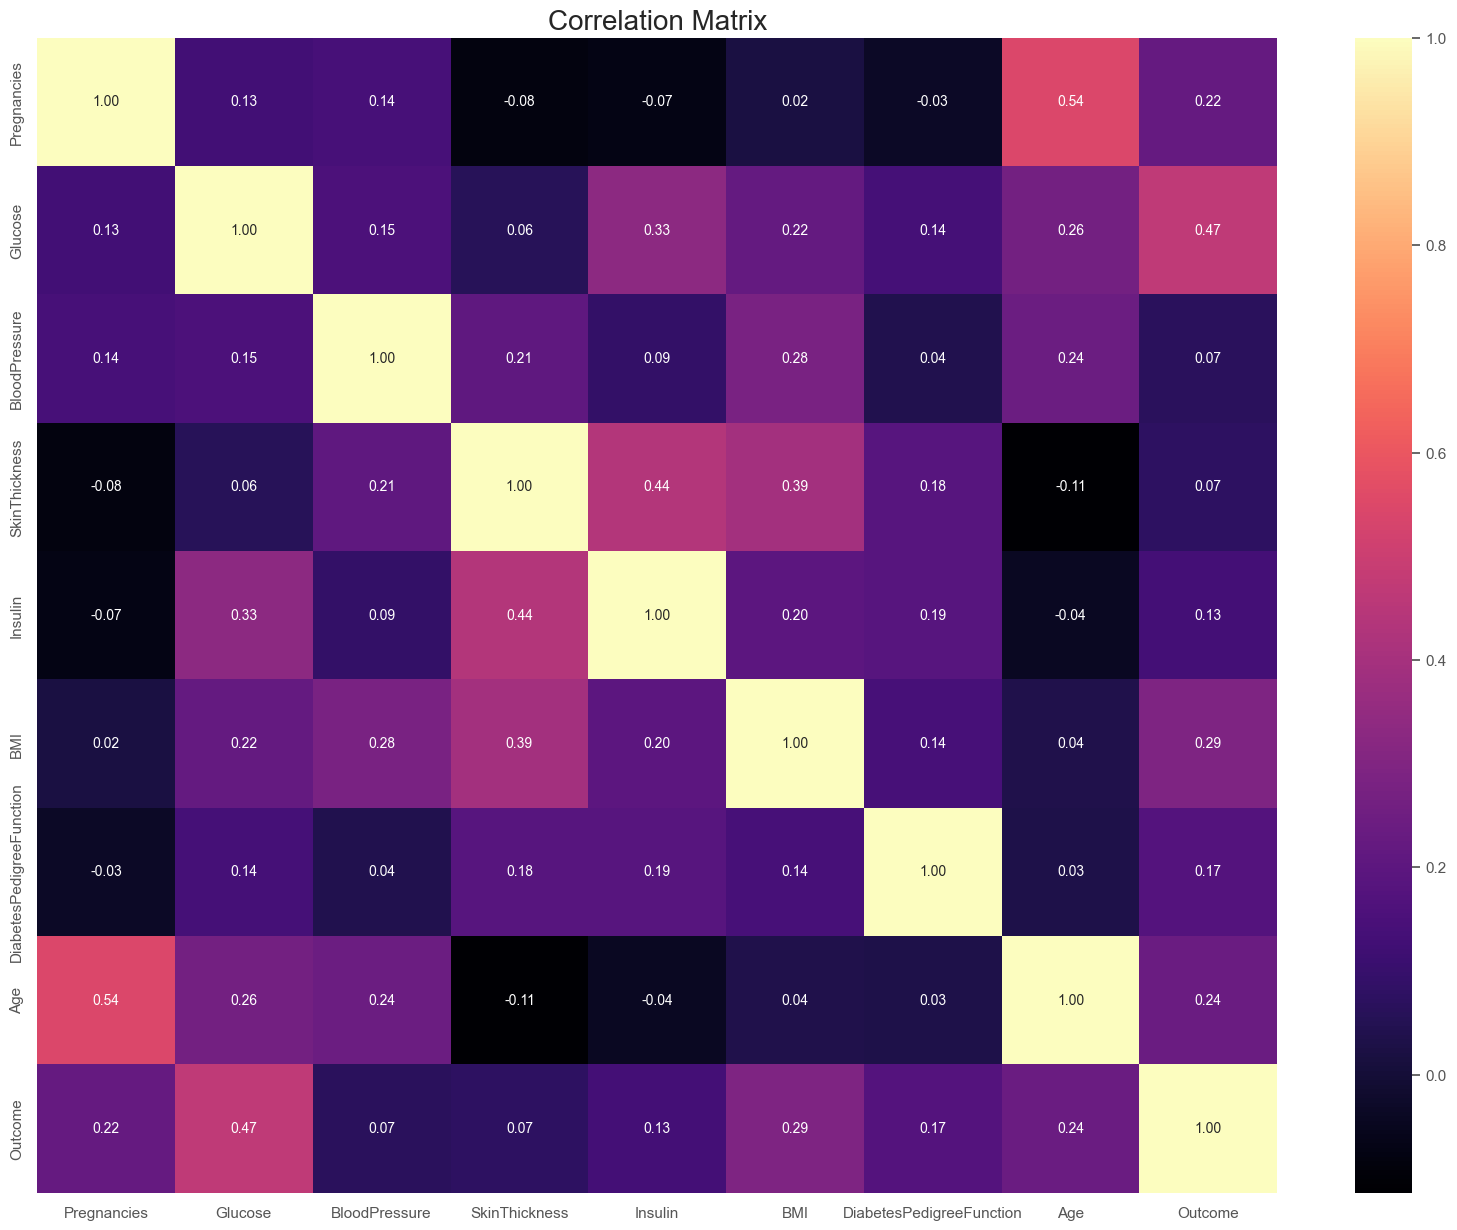

In [17]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
df[df.Pregnancies==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
16             0      118             84             47      230  45.8   
45             0      180             66             39        0  42.0   
57             0      100             88             60      110  46.8   
58             0      146             82              0        0  40.5   
..           ...      ...            ...            ...      ...   ...   
713            0      134             58             20      291  26.4   
727            0      141             84             26        0  32.4   
736            0      126             86             27      120  27.4   
753            0      181             88             44      510  43.3   
757            0      123             72              0        0  36.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
16                      0.551   31        1  
45                      1.893   25        1  
57                      0.962   31        0  
58                      1.781   44        0  
..                        ...  ...      ...  
713                     0.352   21        0  
727                     0.433   22        0  
736                     0.515   21        0  
753                     0.222   26        1  
757                     0.258   52        1  

[111 rows x 9 columns]

In [19]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [20]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

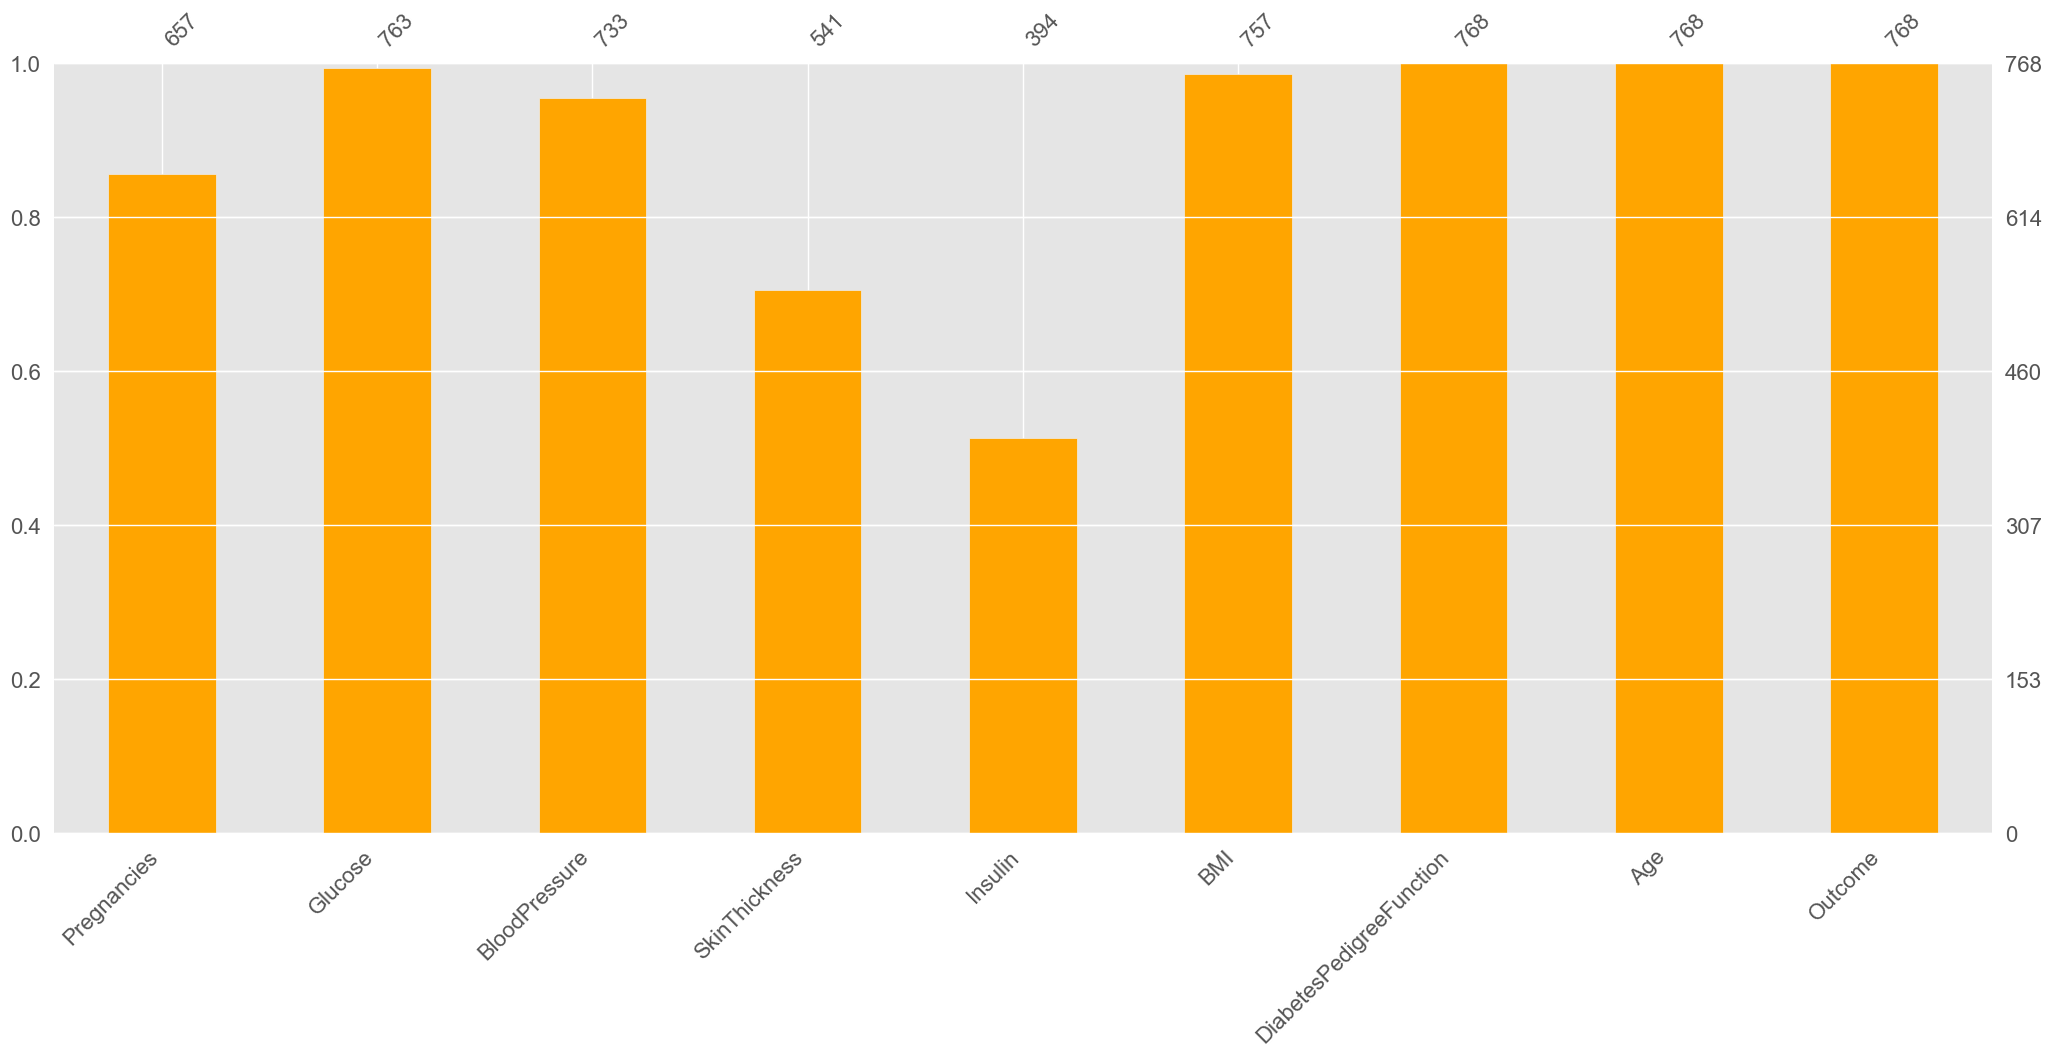

In [21]:
import missingno as msno
msno.bar(df, color="orange")

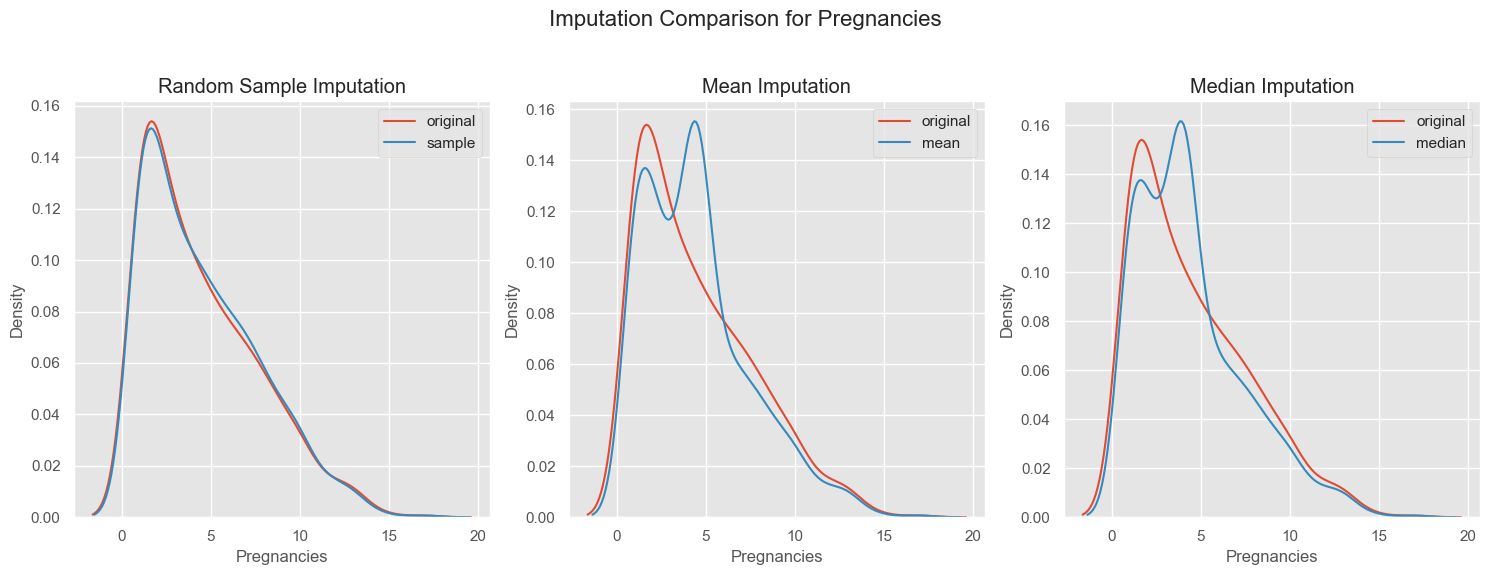

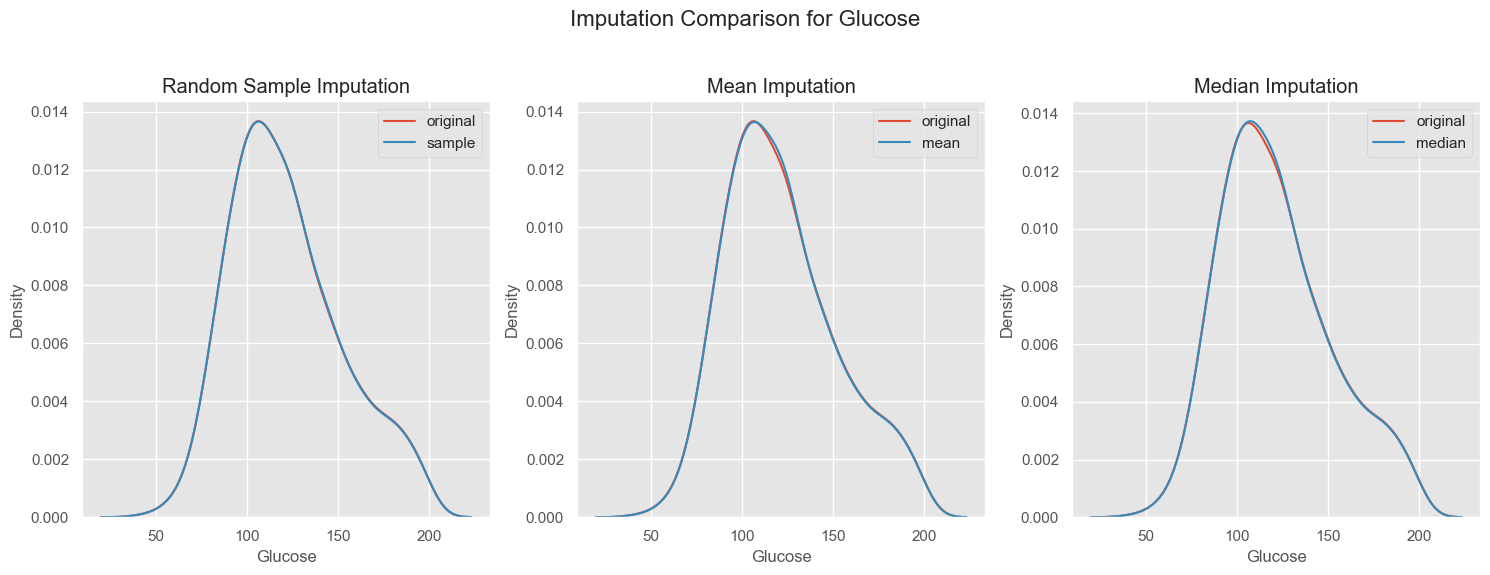

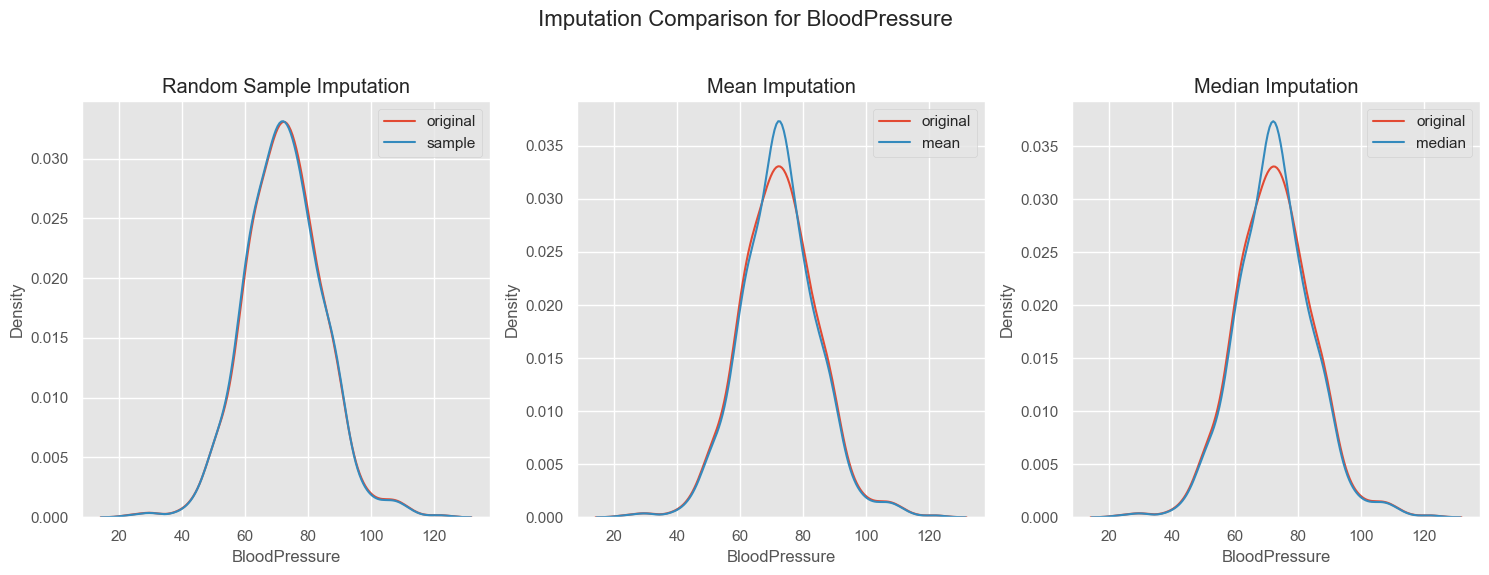

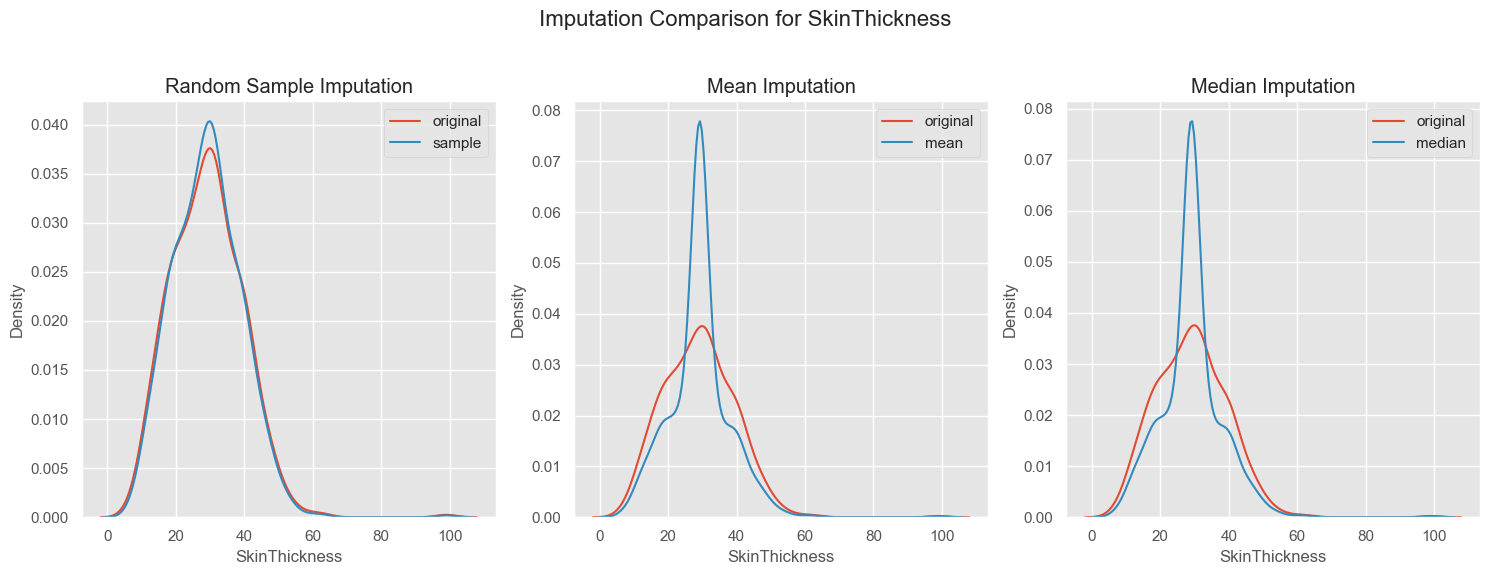

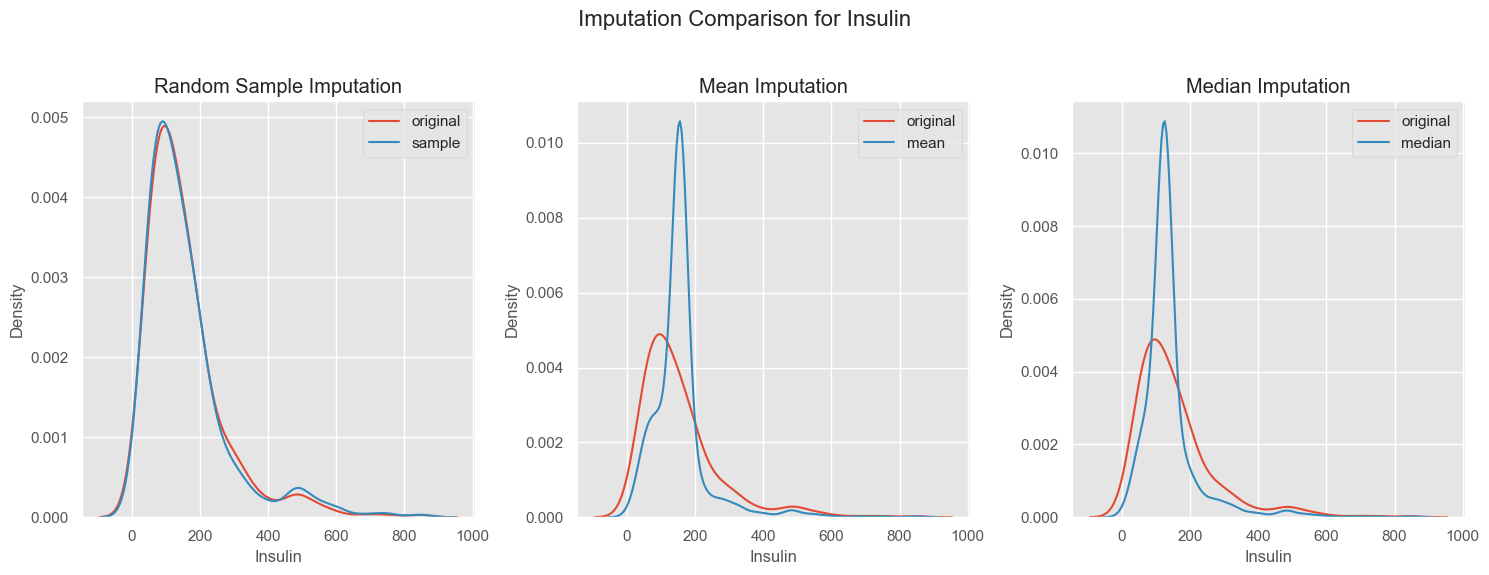

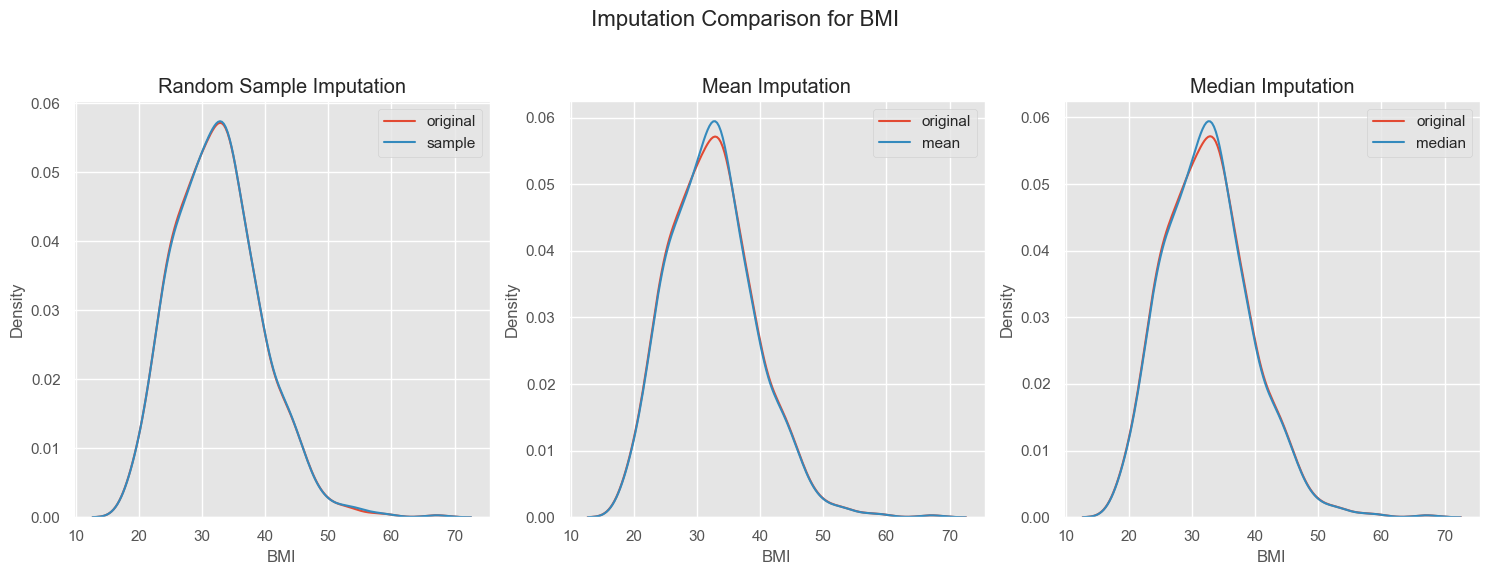

[SKIPPED] DiabetesPedigreeFunction has no missing values.
[SKIPPED] Age has no missing values.
[SKIPPED] Outcome has no missing values.


In [22]:
for feature in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    fig.suptitle(f'Imputation Comparison for {feature}', fontsize=16)

    if df[feature].isnull().sum() == 0:
        print(f"[SKIPPED] {feature} has no missing values.")
        plt.close(fig)
        continue

    # Random sample imputation
    sampled_vals = df[feature].dropna().sample(df[feature].isna().sum(), replace=True, random_state=42)
    sample_imputed = df[feature].copy()
    sample_imputed[df[feature].isna()] = sampled_vals.values
    sns.kdeplot(df[feature], label='original', ax=axes[0])
    sns.kdeplot(sample_imputed, label='sample', ax=axes[0])
    axes[0].set_title("Random Sample Imputation")
    axes[0].legend()

    # Mean imputation
    mean_imputed = df[feature].fillna(df[feature].mean())
    sns.kdeplot(df[feature], label='original', ax=axes[1])
    sns.kdeplot(mean_imputed, label='mean', ax=axes[1])
    axes[1].set_title("Mean Imputation")
    axes[1].legend()

    # Median imputation
    median_imputed = df[feature].fillna(df[feature].median())
    sns.kdeplot(df[feature], label='original', ax=axes[2])
    sns.kdeplot(median_imputed, label='median', ax=axes[2])
    axes[2].set_title("Median Imputation")
    axes[2].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [23]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [24]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [25]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

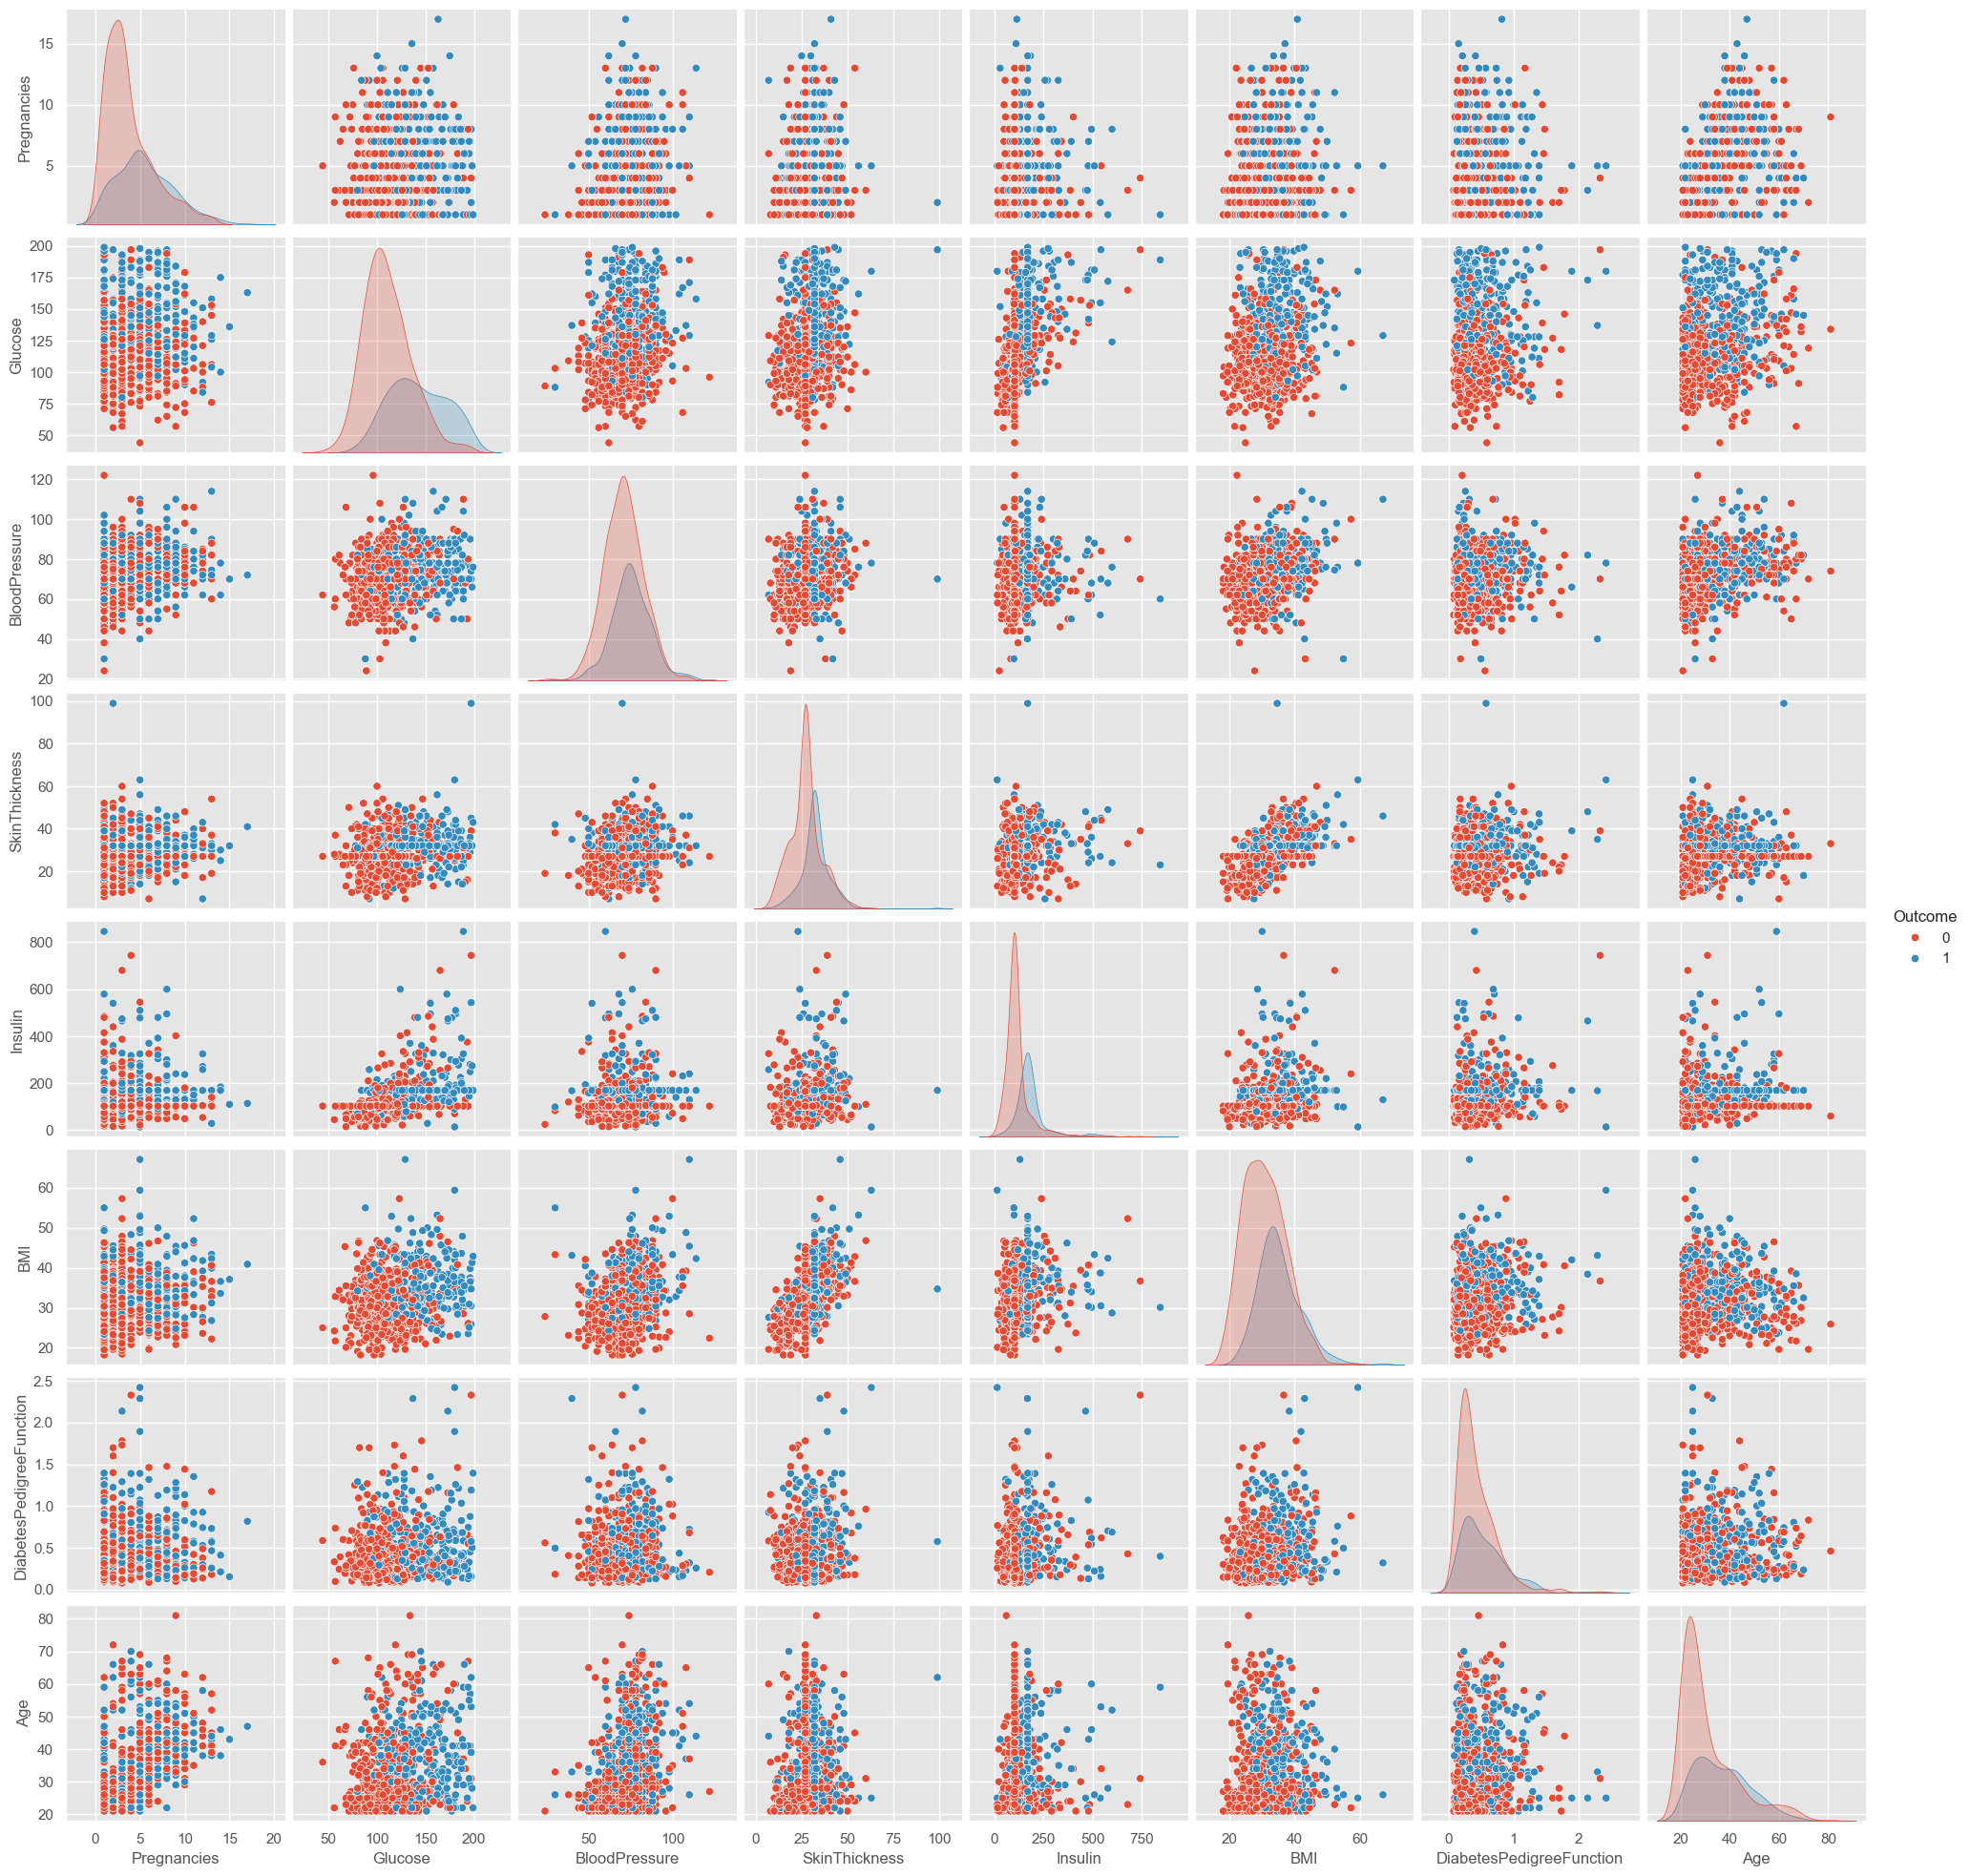

In [27]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [67]:
# Outlier Detection
for feature in X.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, ": yes")
        print(f"Number of Outliers for {feature} : {len(df[(df[feature]>upper)])}")
    else:
        print(feature, "no")

Pregnancies : yes
Number of Outliers for Pregnancies : 14
Glucose no
BloodPressure : yes
Number of Outliers for BloodPressure : 8
SkinThickness no
Insulin no
BMI : yes
Number of Outliers for BMI : 5
DiabetesPedigreeFunction : yes
Number of Outliers for DiabetesPedigreeFunction : 28
Age : yes
Number of Outliers for Age : 8


<Axes: xlabel='SkinThickness'>

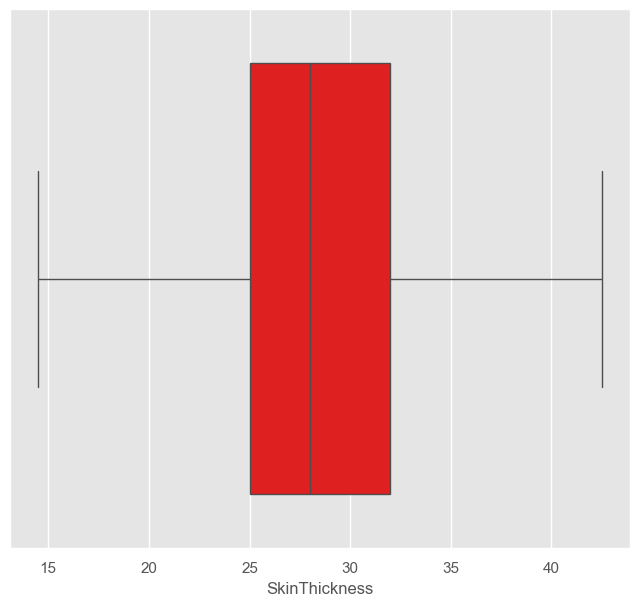

In [68]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")

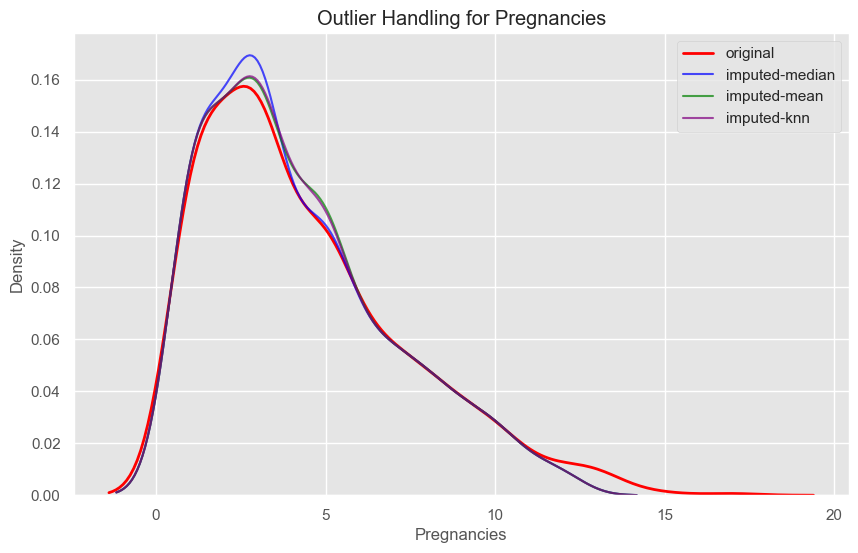

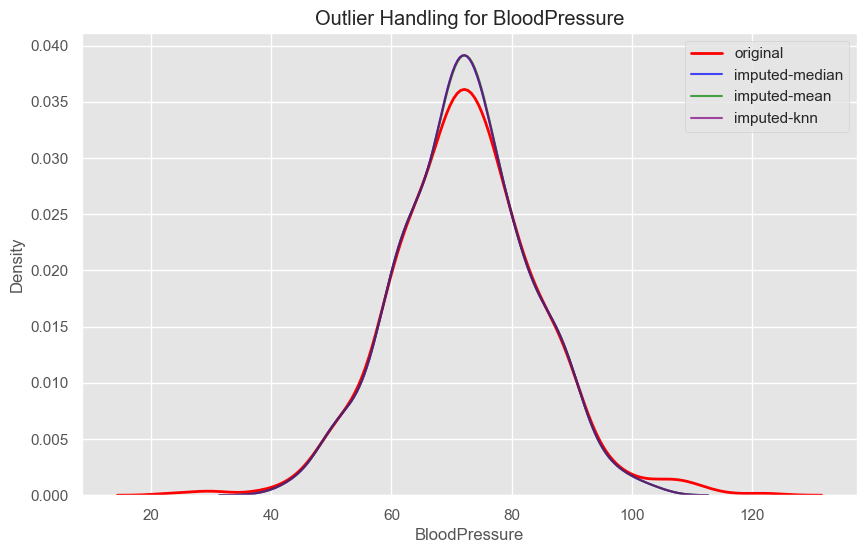

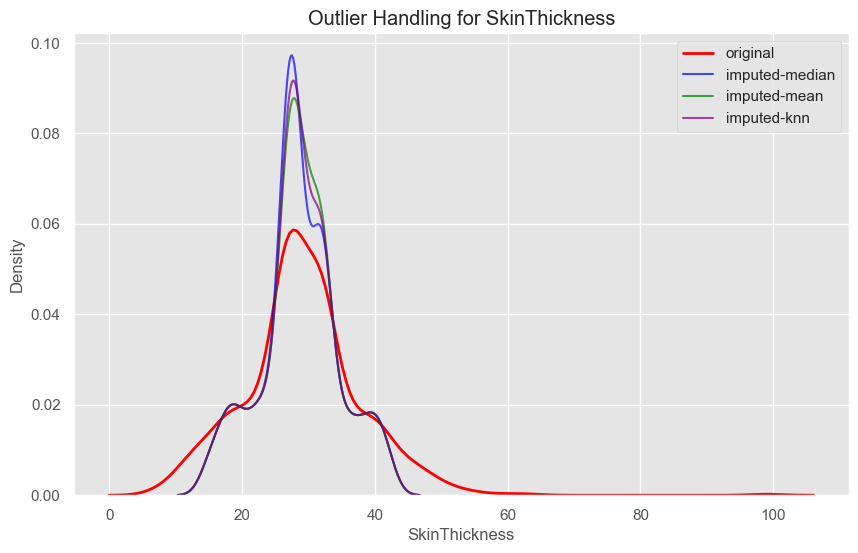

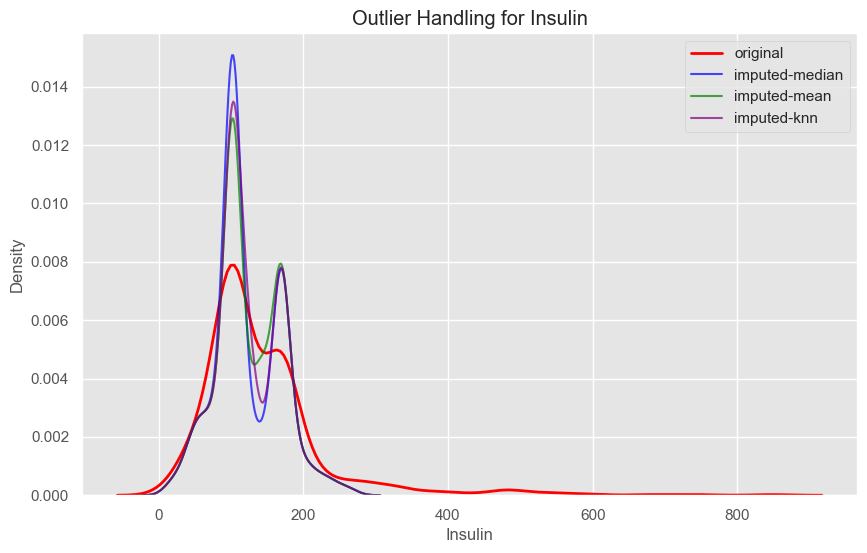

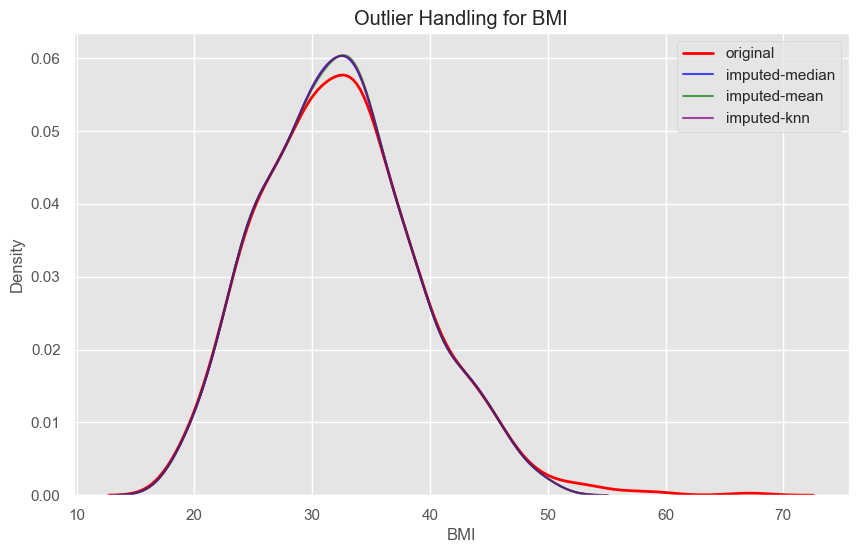

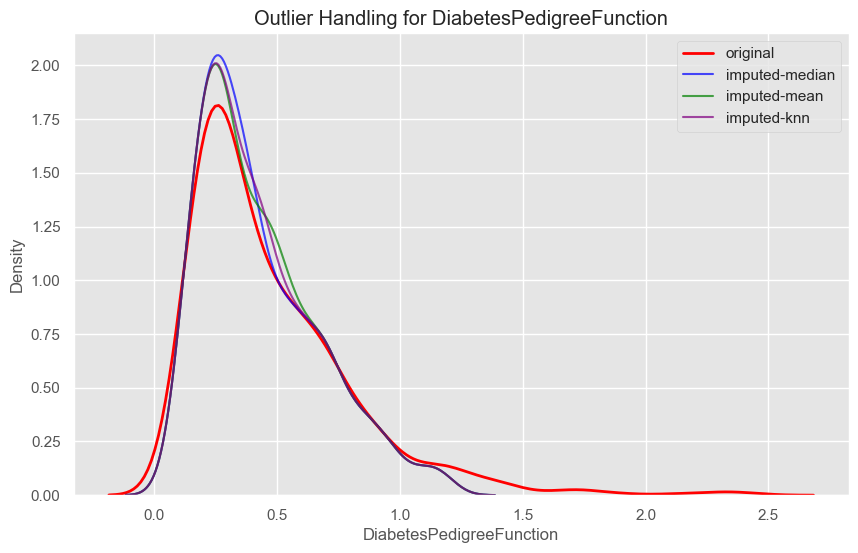

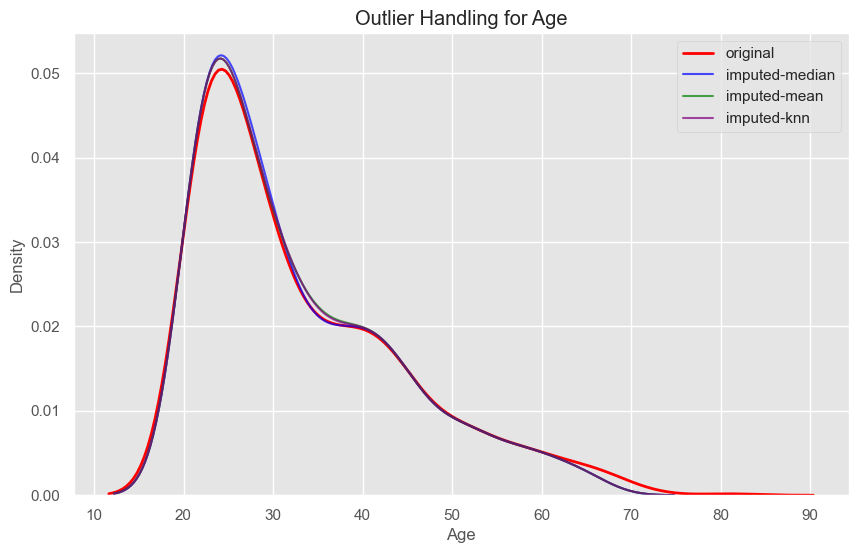

In [30]:
from sklearn.impute import KNNImputer
outlier_features = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in outlier_features:
    fig, ax = plt.subplots(figsize=(10, 6))

    # IQR calculation for this column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Mean and Median Imputation
    col_median = df[col].copy()
    col_mean = df[col].copy()
    col_median[(col_median > upper) | (col_median < lower)] = df[col].median()
    col_mean[(col_mean > upper) | (col_mean < lower)] = df[col].mean()

    # KNN Imputation (set outliers to NaN first)
    df_copy = df[[col]].copy()
    df_copy.loc[(df_copy[col] > upper) | (df_copy[col] < lower), col] = np.nan
    imputer = KNNImputer(n_neighbors=10)
    df_copy[[col]] = imputer.fit_transform(df_copy[[col]])

    # Plotting
    sns.kdeplot(x=df[col], color="red", label='original', linewidth=2)
    sns.kdeplot(x=col_median, color="blue", label='imputed-median', alpha=0.7)
    sns.kdeplot(x=col_mean, color="green", label='imputed-mean', alpha=0.7)
    sns.kdeplot(x=df_copy[col], color="purple", label='imputed-knn', alpha=0.7)
    plt.title(f"Outlier Handling for {col}")
    plt.legend()
    plt.show()


In [31]:
# We see that SkinThickness and Insulin have large no of outliers so KNN imputer and other imputation changes the distribution

In [32]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

In [33]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['SkinThickness']>upper, "SkinThickness"] = upper
df.loc[df['SkinThickness']<lower, "SkinThickness"] = lower

In [34]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [35]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [36]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-2.38420491, -2.11309396, -2.08523974, -2.06497407, -1.98766246,
       -1.91633365, -1.73317123, -1.72240484, -1.70215105, -1.6894111 ,
       -1.64534857, -1.64069203, -1.63762161, -1.61266721, -1.61198101,
       -1.60977279, -1.60214364, -1.58477654, -1.57484724, -1.52720467])

In [37]:
thresold = np.sort(df_scores)[7]

In [38]:
thresold

-1.7224048355931665

In [39]:
outlier = df_scores>thresold

In [40]:
df = df[outlier]

In [41]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [42]:
df.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

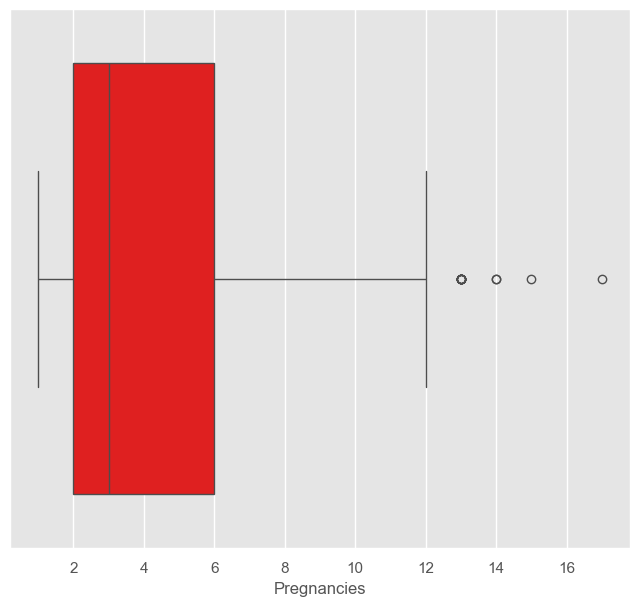

In [43]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [44]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [45]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [46]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [47]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI  
0                     0.627   50        1  Obesity 2  
1                     0.351   31        0  Obesity 2  
2                     0.672   32        1  Obesity 2  
3                     0.167   21        0  Obesity 2  
4                     2.288   33        1  Obesity 3

In [48]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [49]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [50]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  
0                     0.627   50        1  Obesity 2        Abnormal  
1                     0.351   31        0  Obesity 2          Normal  
2                     0.672   32        1  Obesity 2        Abnormal  
3                     0.167   21        0  Obesity 2          Normal  
4                     2.288   33        1  Obesity 3        Abnormal

In [51]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  \
0                     0.627   50        1  Obesity 2        Abnormal   
1                     0.351   31        0  Obesity 2          Normal   
2                     0.672   32        1  Obesity 2        Abnormal   
3                     0.167   21        0  Obesity 2          Normal   
4                     2.288   33        1  Obesity 3        Abnormal   

  NewGlucose  
0     Secret  
1     Normal  
2     Secret  
3     Normal  
4     Secret

In [53]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True , dtype= int)

In [54]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1                 0                 1   
1                     0.351   31        0                 0                 1   
2                     0.672   32        1                 0                 1   
3                     0.167   21        0                 0                 1   
4                     2.288   33        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       0               0                  0   
1                       1               0                  1   
2                       0               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [56]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [57]:
categorical_df.head()

NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  NewBMI_Overweight  \
0                 0                 1                 0                  0   
1                 0                 1                 0                  0   
2                 0                 1                 0                  0   
3                 0                 1                 0                  0   
4                 0                 0                 1                  0   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0                   0                       0               0   
1                   0                       1               0   
2                   0                       0               0   
3                   0                       1               0   
4                   0                       0               0   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0                  0                      0                  1  
1                  1                      0                  0  
2                  0                      0                  1  
3                  1                      0                  0  
4                  0                      0                  1

In [58]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [59]:
cols = X.columns
index = X.index

In [60]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [69]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [70]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75  0.756098          0.000       1.000000  0.981343  0.172222   
1        -0.50 -0.780488         -0.375       0.142857 -0.018657 -0.605556   
2         1.25  1.609756         -0.500       0.571429  0.981343 -0.972222   
3        -0.50 -0.682927         -0.375      -0.714286 -0.145522 -0.438889   
4         0.50  0.487805         -2.000       1.000000  0.958955  1.227778   

   DiabetesPedigreeFunction       Age  
0                  0.670588  1.235294  
1                 -0.050980  0.117647  
2                  0.788235  0.176471  
3                 -0.532026 -0.470588  
4                  5.013072  0.235294

In [71]:
X = pd.concat([X, categorical_df], axis=1)

In [72]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75  0.756098          0.000       1.000000  0.981343  0.172222   
1        -0.50 -0.780488         -0.375       0.142857 -0.018657 -0.605556   
2         1.25  1.609756         -0.500       0.571429  0.981343 -0.972222   
3        -0.50 -0.682927         -0.375      -0.714286 -0.145522 -0.438889   
4         0.50  0.487805         -2.000       1.000000  0.958955  1.227778   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                  0.670588  1.235294                 0                 1   
1                 -0.050980  0.117647                 0                 1   
2                  0.788235  0.176471                 0                 1   
3                 -0.532026 -0.470588                 0                 1   
4                  5.013072  0.235294                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       0               0                  0   
1                       1               0                  1   
2                       0               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

In [103]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [104]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
X_train

array([[ 0.54589555,  0.12540651,  0.49858895, ..., -0.56975322,
         1.32801972, -0.78004206],
       [ 0.54589555,  0.0924846 , -0.02625667, ..., -0.56975322,
         1.32801972, -0.78004206],
       [ 1.86954259, -0.6647195 ,  1.1983831 , ..., -0.56975322,
         1.32801972, -0.78004206],
       ...,
       [ 2.86227787, -0.50010991, -0.20120521, ..., -0.56975322,
         1.32801972, -0.78004206],
       [ 0.21498379,  2.23240922,  2.77291995, ..., -0.56975322,
        -0.75300087,  1.28198216],
       [-1.10866325, -1.32315785, -0.02625667, ...,  1.75514584,
        -0.75300087, -0.78004206]])

In [106]:
# Machine Learning Algo

In [107]:
# Logistic Regreesion

In [108]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = accuracy_score(self.y_test, y_pred_class)
        precision = precision_score(self.y_test, y_pred_class)
        recall = recall_score(self.y_test, y_pred_class)
        f1score = f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        cm = confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(classification_report(self.y_test, y_pred_class))
               



******************************
Accuracy is : 84.9%
Precision is : 74.2%
Recall is : 89.1%
F1 Score is : 81.0%
Roc-Auc Score is:92.3%
******************************


              precision    recall  f1-score   support

           0       0.93      0.82      0.87        97
           1       0.74      0.89      0.81        55

    accuracy                           0.85       152
   macro avg       0.84      0.86      0.84       152
weighted avg       0.86      0.85      0.85       152

******************************




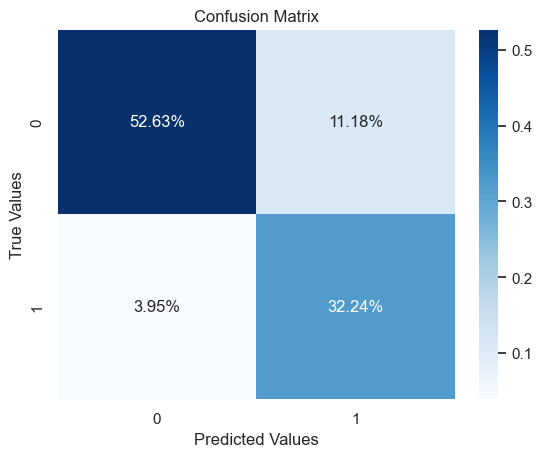

******************************




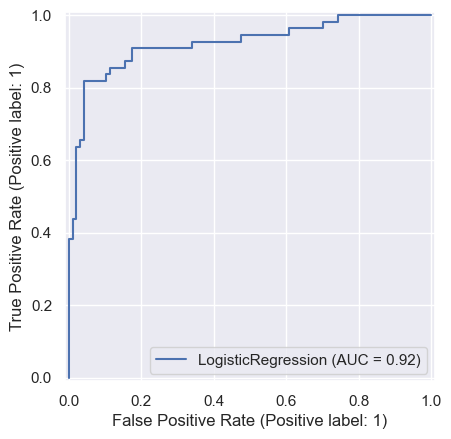

In [109]:
# build logistic model
logreg_ci = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_ci_modebuilder = ModelBuilder(logreg_ci, X_train, X_test, y_train, y_test)

# Train and Predict the Test Labels
y_pred_class  = lr_ci_modebuilder.train_model()
lr_metrics = lr_ci_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 88.8%
Precision is : 82.8%
Recall is : 87.3%
F1 Score is : 85.0%
Roc-Auc Score is:88.5%
******************************


              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.83      0.87      0.85        55

    accuracy                           0.89       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152

******************************




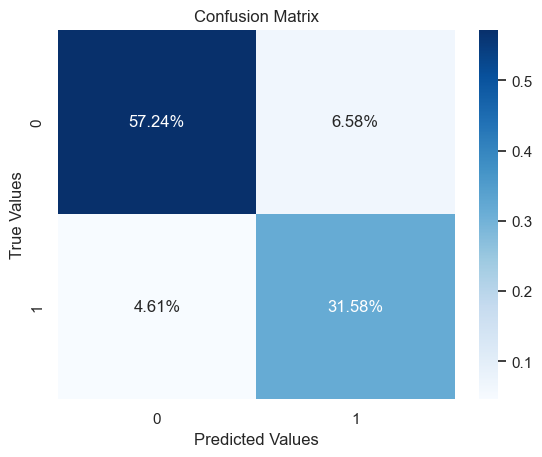

******************************




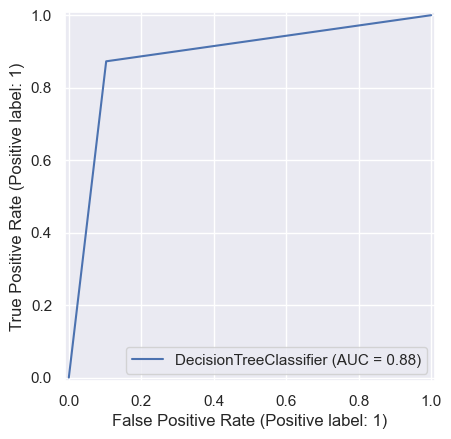

In [110]:
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)
dt_modelbuilder = ModelBuilder(dt, X_train, X_test, y_train, y_test)
y_pred_class  = dt_modelbuilder.train_model()
dt_metrics_cv = dt_modelbuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 88.2%
Precision is : 83.6%
Recall is : 83.6%
F1 Score is : 83.6%
Roc-Auc Score is:94.2%
******************************


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        97
           1       0.84      0.84      0.84        55

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152

******************************




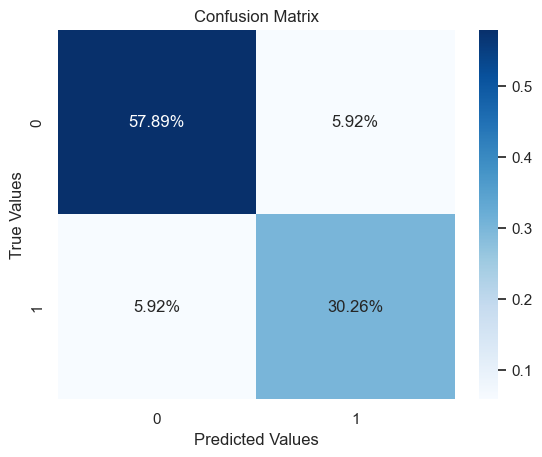

******************************




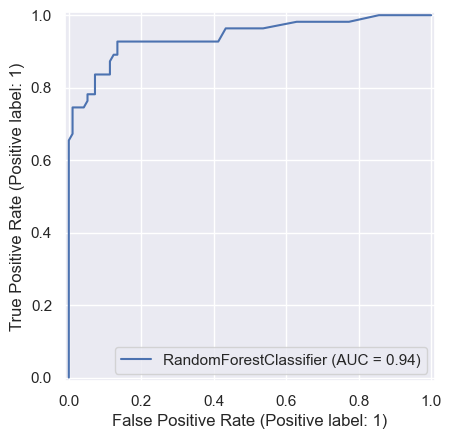

In [111]:
rf = RandomForestClassifier( random_state=42, criterion="gini")
rf_modebuilder = ModelBuilder(rf, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

[LightGBM] [Info] Number of positive: 210, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345395 -> initscore=-0.639344
[LightGBM] [Info] Start training from score -0.639344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

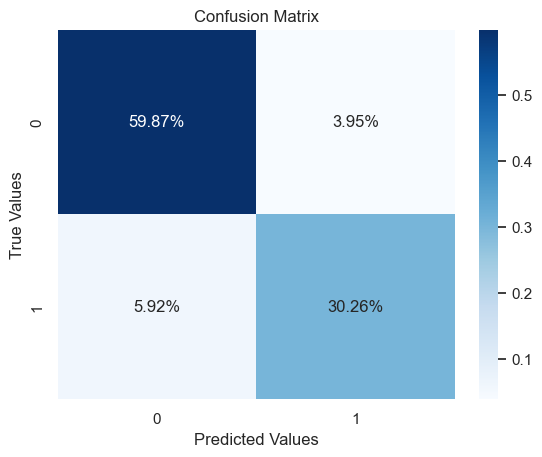

******************************




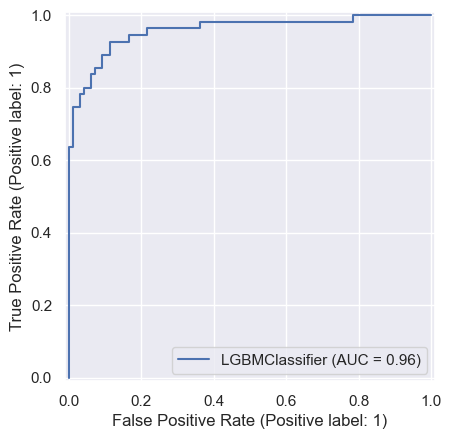

In [112]:
lgbm = LGBMClassifier()
lgbm_modebuilder = ModelBuilder(lgbm, X_train, X_test, y_train, y_test)
y_pred_class  = lgbm_modebuilder.train_model()
lgbm_metrics = lgbm_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 90.1%
Precision is : 87.0%
Recall is : 85.5%
F1 Score is : 86.2%
Roc-Auc Score is:95.8%
******************************


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        97
           1       0.87      0.85      0.86        55

    accuracy                           0.90       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.90      0.90      0.90       152

******************************




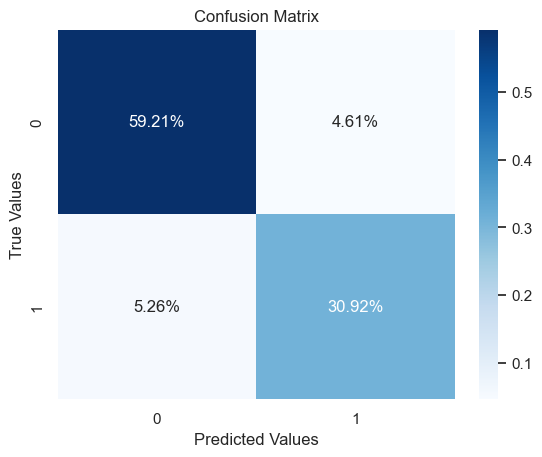

******************************




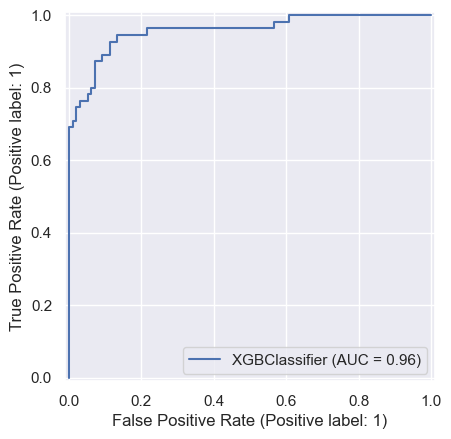

In [113]:
xg = XGBClassifier()
xgb_modebuilder = ModelBuilder(xg, X_train, X_test, y_train, y_test)
y_pred_class  = xgb_modebuilder.train_model()
xgb_metrics = xgb_modebuilder.evaluate_model(y_pred_class)

In [127]:
def objective(trial):
        model_name = trial.suggest_categorical("model",["SVC","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVC":
            kernel_svm = trial.suggest_categorical("kernel_svc",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,5)
                model = SVC(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,3)
                model = SVC(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,3)
                model = SVC(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")
                

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,100)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,10)
            model = RandomForestClassifier(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,100)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingClassifier(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,20)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsClassifier(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,150)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,15)
            model = XGBClassifier(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMClassifier(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42,n_jobs=-1)


        # train the model
        model.fit(X_train,y_train)


        # get the predictions
        y_pred_train = model.predict(X_train)
        y_pred_test= model.predict(X_test)

        # calculate the error
        score = accuracy_score(y_test,y_pred_test)

        return score

In [128]:
study = optuna.create_study(direction="maximize",study_name="model_selection")

# optimize the objective function
study.optimize(objective,n_trials=50,n_jobs=-1)

[I 2025-06-06 15:29:15,278] A new study created in memory with name: model_selection
[I 2025-06-06 15:29:15,559] Trial 7 finished with value: 0.8618421052631579 and parameters: {'model': 'SVC', 'kernel_svc': 'linear', 'c_linear': 1.9118510924028997}. Best is trial 7 with value: 0.8618421052631579.
[I 2025-06-06 15:29:15,918] Trial 8 finished with value: 0.7894736842105263 and parameters: {'model': 'SVC', 'kernel_svc': 'rbf', 'c_rbf': 48.29705700874618, 'gamma_rbf': 0.7523665897959497}. Best is trial 7 with value: 0.8618421052631579.
[I 2025-06-06 15:29:16,294] Trial 6 finished with value: 0.881578947368421 and parameters: {'model': 'RF', 'n_estimators_rf': 19, 'max_depth_rf': 5}. Best is trial 6 with value: 0.881578947368421.
[I 2025-06-06 15:29:16,309] Trial 3 finished with value: 0.8355263157894737 and parameters: {'model': 'KNN', 'n_neighbors_knn': 3, 'weights_knn': 'uniform'}. Best is trial 6 with value: 0.881578947368421.
[I 2025-06-06 15:29:16,437] Trial 4 finished with value: 0.

[I 2025-06-06 15:29:21,411] Trial 39 finished with value: 0.8881578947368421 and parameters: {'model': 'XGB', 'n_estimators_xgb': 67, 'learning_rate_xgb': 0.2928600256638027, 'max_depth_xgb': 8}. Best is trial 17 with value: 0.9276315789473685.
[I 2025-06-06 15:29:22,027] Trial 26 finished with value: 0.9013157894736842 and parameters: {'model': 'GB', 'n_estimators_gb': 46, 'learning_rate_gb': 0.8211895755427677, 'max_depth_gb': 8}. Best is trial 17 with value: 0.9276315789473685.
[I 2025-06-06 15:29:22,832] Trial 42 finished with value: 0.8947368421052632 and parameters: {'model': 'RF', 'n_estimators_rf': 79, 'max_depth_rf': 2}. Best is trial 17 with value: 0.9276315789473685.
[I 2025-06-06 15:29:23,138] Trial 43 finished with value: 0.8947368421052632 and parameters: {'model': 'RF', 'n_estimators_rf': 96, 'max_depth_rf': 2}. Best is trial 17 with value: 0.9276315789473685.
[I 2025-06-06 15:29:23,465] Trial 44 finished with value: 0.8947368421052632 and parameters: {'model': 'RF', 'n_

In [129]:
study.best_params

{'model': 'GB',
 'n_estimators_gb': 96,
 'learning_rate_gb': 0.43833155706975285,
 'max_depth_gb': 2}

In [130]:
study.best_value

0.9276315789473685

In [131]:
params =  {
 'n_estimators': 96,
 'learning_rate': 0.43833155706975285,
 'max_depth': 2}



******************************
Accuracy is : 92.8%
Precision is : 90.7%
Recall is : 89.1%
F1 Score is : 89.9%
Roc-Auc Score is:94.8%
******************************


              precision    recall  f1-score   support

           0       0.94      0.95      0.94        97
           1       0.91      0.89      0.90        55

    accuracy                           0.93       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.93      0.93      0.93       152

******************************




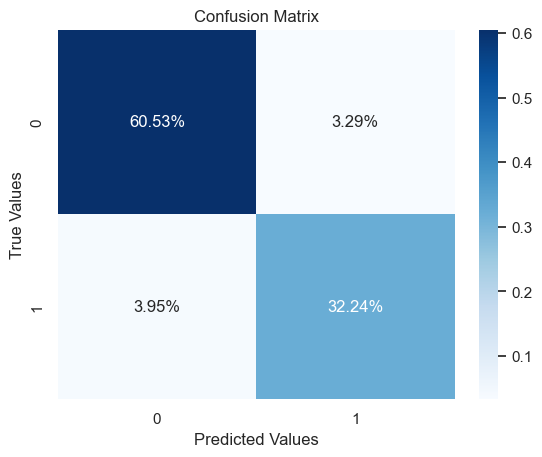

******************************




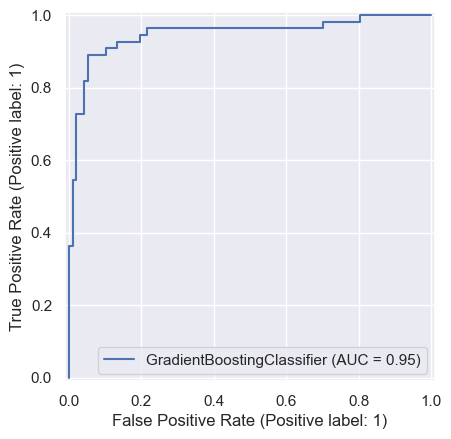

In [132]:
gb_optuna_model = GradientBoostingClassifier(**params)
gb_optuna_modebuilder = ModelBuilder(gb_optuna_model, X_train, X_test, y_train, y_test)
y_pred_class  = gb_optuna_modebuilder.train_model()
gb_optuna_metrics = gb_optuna_modebuilder.evaluate_model(y_pred_class)

In [138]:
metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Decision Tree': dt_metrics_cv,
        'Random Forest': rf_metrics,
        'XG Boost': xgb_metrics,
        'LightGBM': lgbm_metrics,
        'GradientBoosting_Optuna': gb_optuna_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression','Decision Tree','Random Forest',
                                                    'XG Boost','LightGBM','GradientBoosting_Optuna'] )

df_metrics

Metric  Logistic Regression  Decision Tree  Random Forest  XG Boost  \
0   Accuracy             0.848684       0.888158       0.881579  0.901316   
1  Precision             0.742424       0.827586       0.836364  0.870370   
2     Recall             0.890909       0.872727       0.836364  0.854545   
3    F1Score             0.809917       0.849558       0.836364  0.862385   
4  Auc Score             0.922774       0.884817       0.941518  0.957638   

   LightGBM  GradientBoosting_Optuna  
0  0.901316                 0.927632  
1  0.884615                 0.907407  
2  0.836364                 0.890909  
3  0.859813                 0.899083  
4  0.958201                 0.947704

[LightGBM] [Info] Number of positive: 210, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345395 -> initscore=-0.639344
[LightGBM] [Info] Start training from score -0.639344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 210, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345395 -> initscore=-0.639344
[LightGBM] [Info] Start training from score -0.639344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

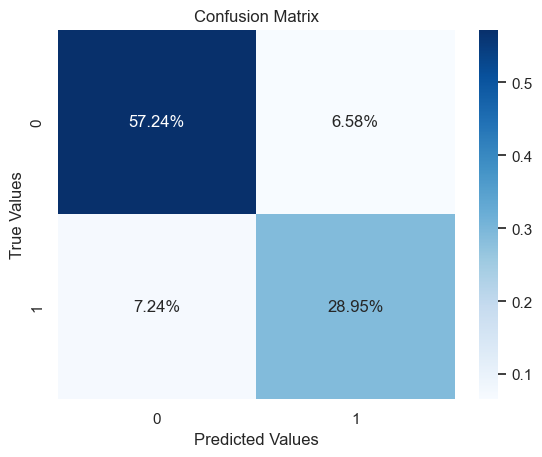

******************************




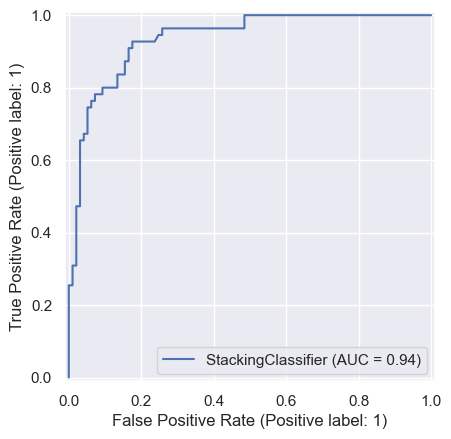

In [141]:
from sklearn.ensemble import StackingClassifier , VotingClassifier
sc = StackingClassifier(estimators=[('lgbm',lgbm),('gb',gb_optuna_model)],final_estimator=lgbm,cv=5)
sc_modebuilder = ModelBuilder(sc, X_train, X_test, y_train, y_test)
y_pred_class  = sc_modebuilder.train_model()
sc_metrics = sc_modebuilder.evaluate_model(y_pred_class)

[LightGBM] [Info] Number of positive: 210, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345395 -> initscore=-0.639344
[LightGBM] [Info] Start training from score -0.639344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


******************************
Accuracy is : 90.1%
Precision is : 88.5%
Recall is : 83.6%
F1 Score is : 86.0%
Roc-Auc Score is:95.5%
******************************


              precision    recall  f1-score   support

           0       0.91      0.94      0.92        97
           1       0.88      0.84      0.86        55

    accuracy                           0.90       152
   macro avg       0.90      0.89      0.89       152
weighted avg       0.90      0.90      0.90       152

******************************




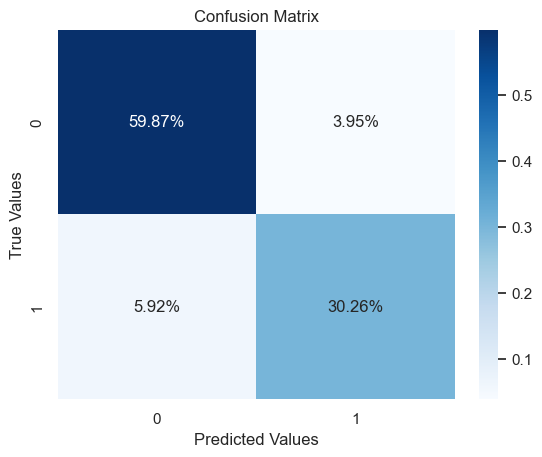

******************************




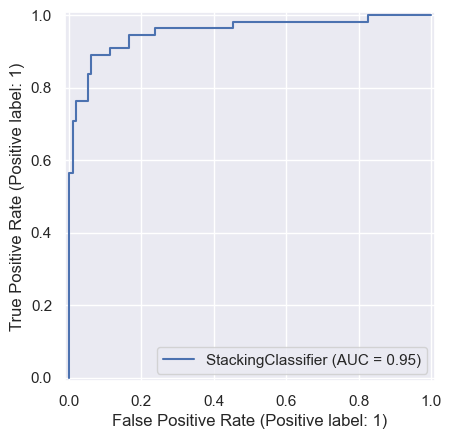

In [142]:
vc = StackingClassifier(estimators=[('lgbm',lgbm),('gb',gb_optuna_model)])
vc_modebuilder = ModelBuilder(vc, X_train, X_test, y_train, y_test)
y_pred_class  = vc_modebuilder.train_model()
vc_metrics = vc_modebuilder.evaluate_model(y_pred_class)

In [144]:
# gb_optuna model is the best model
params = {
    'max_depth': [2,3,5,7,8,10,15,18],
    'min_samples_leaf': [5,10,15,20,50],
    'n_estimators': [10,15,20,23,25,50,100],
    'loss' : ['log_loss', 'exponential']
}
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [145]:
grid_search = GridSearchCV(estimator=gb_optuna_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 560 candidates, totalling 2240 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingClassifier(learning_rate=0.43833155706975285,
                                                  max_depth=2,
                                                  n_estimators=96),
             n_jobs=-1,
             param_grid={'loss': ['log_loss', 'exponential'],
                         'max_depth': [2, 3, 5, 7, 8, 10, 15, 18],
                         'min_samples_leaf': [5, 10, 15, 20, 50],
                         'n_estimators': [10, 15, 20, 23, 25, 50, 100]},
             verbose=1)



******************************
Accuracy is : 86.8%
Precision is : 81.8%
Recall is : 81.8%
F1 Score is : 81.8%
Roc-Auc Score is:95.2%
******************************


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        97
           1       0.82      0.82      0.82        55

    accuracy                           0.87       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.87      0.87      0.87       152

******************************




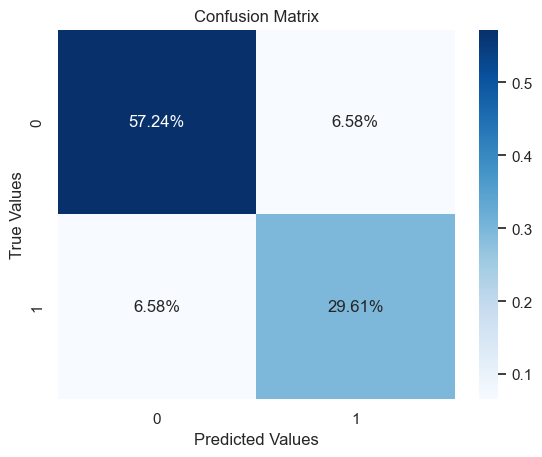

******************************




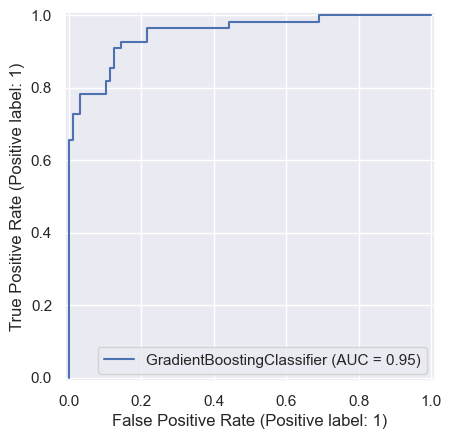

In [147]:
gb_best = grid_search.best_estimator_
gb_best_modebuilder2 = ModelBuilder(gb_best, X_train, X_test, y_train, y_test)
y_pred_class  = gb_best_modebuilder2.train_model()
gb_metrics2 = gb_best_modebuilder2.evaluate_model(y_pred_class)

In [148]:
# gb_optuna model is the best model

In [149]:
import pickle
model = gb_optuna_model
pickle.dump(model, open("diabetes.pkl",'wb'))